### Galaxy environment

Some methods to test galaxy environment

In [113]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

import pickle

import astroquery.vizier as vizier
import astropy.units as u
import astropy.coordinates as coord

%matplotlib inline

## directory
rootdir = "/home/stephane/Science/Galaxies"
wdir    = "%s/products"%(rootdir)

import sys, os
sys.path.append("%s/master/notebooks"%(rootdir))

os.chdir(wdir)

## Settings
vizier.Vizier.ROW_LIMIT = 500

In [114]:
def get_2mass(source, conesize = 0.5):
    "Get the 2MASS data from Vizier"
    
    c = coord.SkyCoord(ra=source[0]*u.deg, dec=source[1]*u.deg)
    res = vizier.Vizier.query_region(c , radius=conesize*u.arcmin,catalog="II/246")
    if len(res[0]) == vizier.Vizier.ROW_LIMIT :
        print("### Number limit of objects reached...")
    print(res)
    
    return(res)

In [115]:
def plot_field(tm ,s):
    "plot the sources in the field"
    
    fig = plt.figure(figsize=(10, 10))
    plt.plot(tm['RAJ2000'], tm['DEJ2000'], "k*")
    plt.plot(s[0], s[1], "r+")
    plt.grid("on")
    plt.show()

## Getting 2MASS for the source ...
TableList with 1 tables:
	'0:II/246/out' with 15 column(s) and 241 row(s) 


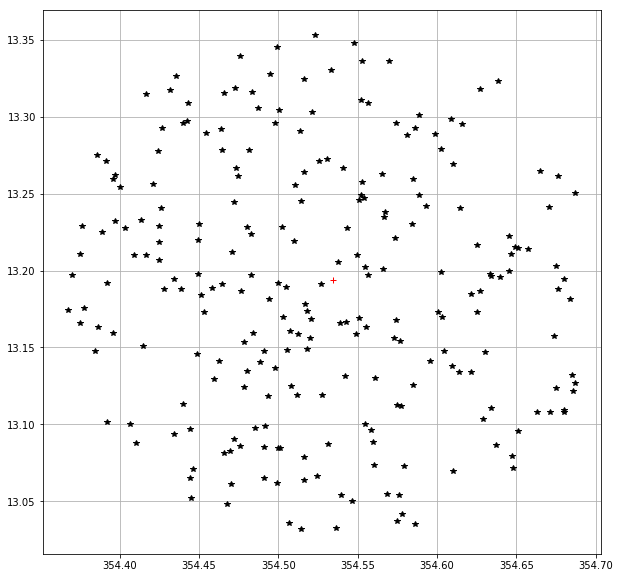

In [116]:
### Main

## 3C 290
s = [354.534183, 13.193635]

print("## Getting 2MASS for the source ...")
tm = get_2mass(s, conesize = 10.0)

# print(tm[0])
plot_field(tm[0], s)